In [1]:
from pynq import Overlay
from pynq import MMIO
from pynq import allocate
import pynq.lib.dma
import numpy as np
import cv2
%matplotlib inline
import matplotlib . pyplot as plt
import time

In [2]:
base = Overlay("mystream.bit")

In [3]:
dma = base.axi_dma_0
registers = base.mystream_0.register_map

In [4]:
height = 512
width = 512
input_arr = allocate(shape=(height, width), dtype=np.int32, cacheable=False)
output_arr = allocate(shape=(height, width), dtype=np.int32, cacheable=False)

In [5]:
src = cv2.imread("raytracing.png", cv2.IMREAD_GRAYSCALE)
print(src.shape)
input_arr[:] = src[:]
output_arr[:] = np.zeros(shape=(height, width), dtype=np.int32)
input_arr.flush()

(512, 512)


In [6]:
registers.CTRL.AP_START = 1
registers.CTRL.AUTO_RESTART = 1

In [7]:
dma.sendchannel.transfer(input_arr)
dma.recvchannel.transfer(output_arr)

In [8]:
dma.sendchannel.wait()
dma.recvchannel.wait()

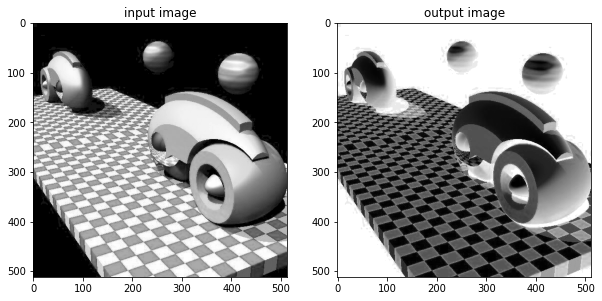

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(input_arr, cmap = "gray")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(output_arr, cmap="gray")
plt.title("output image")
plt.show()